# Analyzing Marketing Campaign with pandas

### 1. Importing Libraries and Loading Data

In [120]:
import matplotlib.pyplot as plt
from datetime import datetime
import pandas as pd
import numpy as np
from scipy import stats

In [122]:
df=pd.read_csv('marketing.csv')

## 2. Data Cleaning and Preprocessing

In [125]:
df.head()

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained
0,a100000029,1/1/18,House Ads,personalization,True,English,English,0-18 years,1/1/18,NaN,House Ads,True
1,a100000030,1/1/18,House Ads,personalization,True,English,English,19-24 years,1/1/18,NaN,House Ads,True
2,a100000031,1/1/18,House Ads,personalization,True,English,English,24-30 years,1/1/18,NaN,House Ads,True
3,a100000032,1/1/18,House Ads,personalization,True,English,English,30-36 years,1/1/18,NaN,House Ads,True
4,a100000033,1/1/18,House Ads,personalization,True,English,English,36-45 years,1/1/18,NaN,House Ads,True


In [127]:
df.describe()

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained
count,10037,10021,10022,10037,10022,10037,10037,10037,1856,577,1856,1856
unique,7309,31,5,2,2,4,4,7,31,115,5,2
top,a100000882,1/15/18,House Ads,control,False,English,English,19-24 years,1/16/18,4/2/18,Instagram,True
freq,12,789,4733,5091,8946,9793,9275,1682,163,15,600,1279


In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10037 entries, 0 to 10036
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   user_id              10037 non-null  object
 1   date_served          10021 non-null  object
 2   marketing_channel    10022 non-null  object
 3   variant              10037 non-null  object
 4   converted            10022 non-null  object
 5   language_displayed   10037 non-null  object
 6   language_preferred   10037 non-null  object
 7   age_group            10037 non-null  object
 8   date_subscribed      1856 non-null   object
 9   date_canceled        577 non-null    object
 10  subscribing_channel  1856 non-null   object
 11  is_retained          1856 non-null   object
dtypes: object(12)
memory usage: 941.1+ KB


In [131]:
df['is_retained'] = df['is_retained'].astype(bool)
df['converted'] = df['converted'].astype(bool)

In [139]:
df['date_served'] = pd.to_datetime(df['date_served'])
df['date_subscribed'] = pd.to_datetime(df['date_subscribed'])
df['date_canceled'] = pd.to_datetime(df['date_canceled'])

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10037 entries, 0 to 10036
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              10037 non-null  object        
 1   date_served          10021 non-null  datetime64[ns]
 2   marketing_channel    10022 non-null  object        
 3   variant              10037 non-null  object        
 4   converted            10037 non-null  bool          
 5   language_displayed   10037 non-null  object        
 6   language_preferred   10037 non-null  object        
 7   age_group            10037 non-null  object        
 8   date_subscribed      1856 non-null   datetime64[ns]
 9   date_canceled        577 non-null    datetime64[ns]
 10  subscribing_channel  1856 non-null   object        
 11  is_retained          10037 non-null  bool          
 12  DoW                  1856 non-null   float64       
 13  DoW_served           10021 non-

In [143]:
df['DoW'] = df['date_subscribed'].dt.dayofweek
df['DoW_served'] = df['date_served'].dt.dayofweek


In [145]:
channel_dict = {"House Ads": 1, "Instagram": 2, "Facebook": 3, "Email": 4, "Push": 5}
df['channel_code'] = df['subscribing_channel'].map(channel_dict)

In [147]:
df['is_correct_lang'] = df.apply(
    lambda x: "Yes" if x['language_preferred'] == x['language_displayed'] else "No",
    axis=1
)


## 3. Analysis

In [150]:
daily_users = df.groupby('date_served')['user_id'].nunique()

In [152]:
print(daily_users)

date_served
2018-01-01    362
2018-01-02    374
2018-01-03    348
2018-01-04    323
2018-01-05    319
2018-01-06    308
2018-01-07    275
2018-01-08    312
2018-01-09    312
2018-01-10    337
2018-01-11    310
2018-01-12    301
2018-01-13    306
2018-01-14    305
2018-01-15    767
2018-01-16    388
2018-01-17    369
2018-01-18    318
2018-01-19    305
2018-01-20    311
2018-01-21    229
2018-01-22    178
2018-01-23    172
2018-01-24    190
2018-01-25    184
2018-01-26    222
2018-01-27    320
2018-01-28    320
2018-01-29    319
2018-01-30    317
2018-01-31    340
Name: user_id, dtype: int64


Text(0, 0.5, 'Number of user')

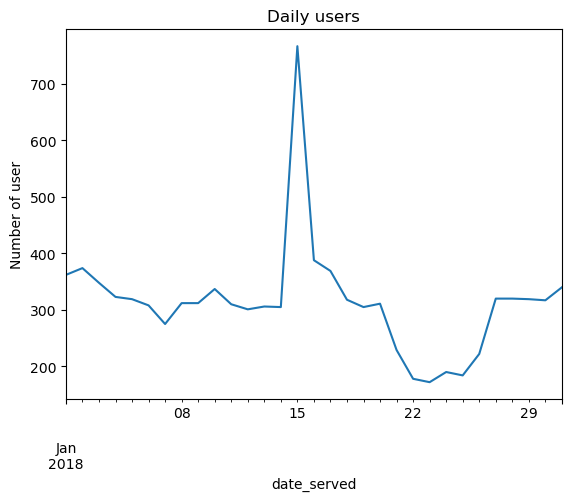

In [154]:
daily_users.plot()
plt.title("Daily users")
plt.ylabel('Number of user')

In [155]:
total_users = df['user_id'].nunique()
subscribers = df[df['converted'] == True]['user_id'].nunique()
conversion_rate = subscribers / total_users
print(round(conversion_rate*100,2), "%")

14.09 %


In [158]:
retained = df[df['is_retained']==True]['user_id'].nunique()
reatantion_rate = retained  / subscribers
print(round(reatantion_rate*100,2),'%')

676.41 %


In [160]:
subscribers = df[df['converted']== True].groupby(['date_served'])['user_id'].nunique()
daily_conversion_rate = subscribers / total_users
print(daily_conversion_rate)

date_served
2018-01-01    0.004925
2018-01-02    0.005062
2018-01-03    0.004925
2018-01-04    0.004789
2018-01-05    0.005473
2018-01-06    0.004789
2018-01-07    0.005336
2018-01-08    0.004925
2018-01-09    0.005336
2018-01-10    0.005473
2018-01-11    0.003420
2018-01-12    0.003147
2018-01-13    0.003557
2018-01-14    0.003557
2018-01-15    0.011903
2018-01-16    0.013545
2018-01-17    0.011082
2018-01-18    0.003968
2018-01-19    0.002463
2018-01-20    0.002873
2018-01-21    0.002736
2018-01-22    0.003010
2018-01-23    0.002873
2018-01-24    0.003010
2018-01-25    0.003147
2018-01-26    0.002736
2018-01-27    0.002873
2018-01-28    0.002736
2018-01-29    0.002600
2018-01-30    0.002873
2018-01-31    0.002463
Name: user_id, dtype: float64


In [162]:
daily_conversion_rate = pd.DataFrame(daily_conversion_rate.reset_index())
daily_conversion_rate.columns = ['date_served', 
                              'conversion_rate']
daily_conversion_rate.head()

,date_served,conversion_rate
0,2018-01-01,0.004925
1,2018-01-02,0.005062
2,2018-01-03,0.004925
3,2018-01-04,0.004789
4,2018-01-05,0.005473


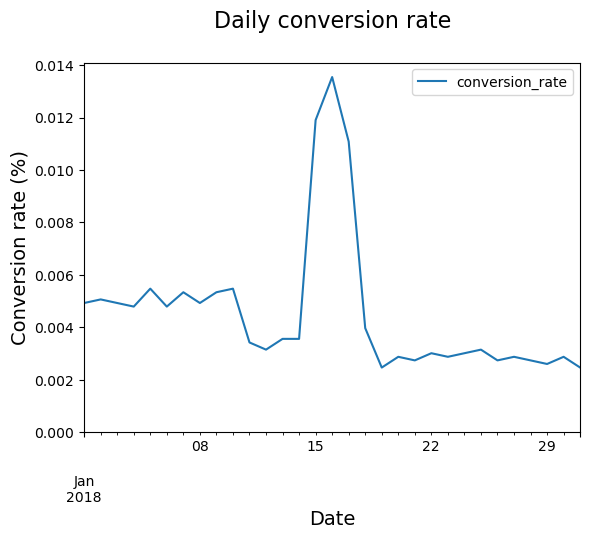

In [164]:
daily_conversion_rate.plot('date_served', 'conversion_rate')

plt.title('Daily conversion rate\n', size = 16)
plt.ylabel('Conversion rate (%)', size = 14)
plt.xlabel('Date', size = 14)
plt.ylim(0)
plt.show()

In [165]:
total_language_displayed = df.groupby(['language_displayed'])['user_id'].nunique()
language_displayed_subscribers = df[df['converted']==True].groupby(['language_displayed'])['user_id'].nunique()
language_conversion_rate = language_displayed_subscribers/total_language_displayed
print(language_conversion_rate)

language_displayed
Arabic     0.500000
English    0.131260
German     0.716216
Spanish    0.200000
Name: user_id, dtype: float64


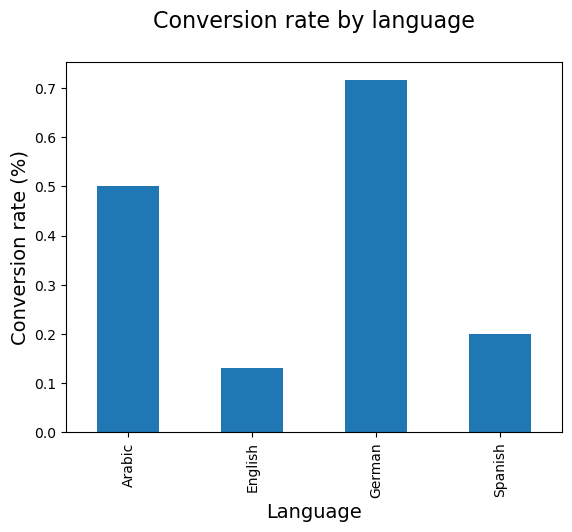

In [168]:
language_conversion_rate.plot(kind='bar')
plt.title('Conversion rate by language\n', size = 16)
plt.xlabel('Language', size = 14)
plt.ylabel('Conversion rate (%)', size = 14)
plt.show()

In [169]:
retention_total = df.groupby(['date_subscribed','subscribing_channel'])['user_id'].nunique()
print(retention_total.head())
retention_subs = df[df['is_retained']==True].groupby(['date_subscribed', 
                                       'subscribing_channel'])['user_id'].nunique()
print(retention_subs.head())

date_subscribed  subscribing_channel
2018-01-01       Email                   1
                 Facebook                8
                 House Ads              16
                 Instagram               8
                 Push                    3
Name: user_id, dtype: int64
date_subscribed  subscribing_channel
2018-01-01       Email                   1
                 Facebook                7
                 House Ads              11
                 Instagram               6
                 Push                    3
Name: user_id, dtype: int64


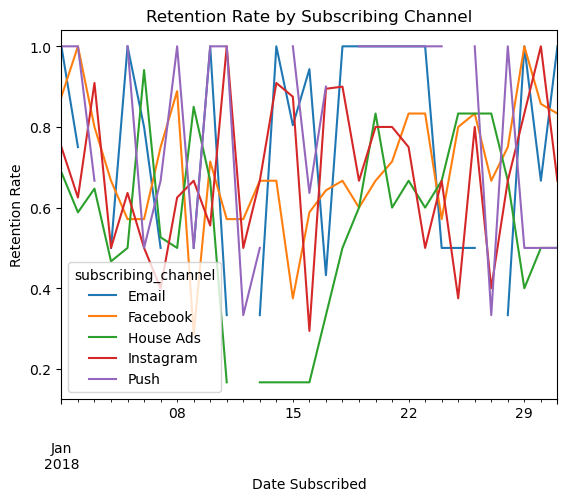

In [172]:
# Calculate retention rate
retention_rate = retention_subs / retention_total

retention_rate_df = retention_rate.unstack()

retention_rate_df.plot()
plt.title('Retention Rate by Subscribing Channel')
plt.xlabel('Date Subscribed')
plt.ylabel('Retention Rate')
plt.show()

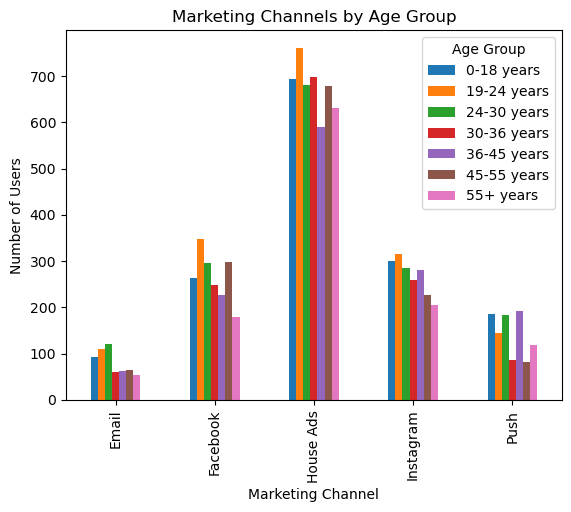

In [173]:
channel_age = df.groupby(['marketing_channel', 'age_group'])['user_id'].count()

channel_age_df = channel_age.unstack()

channel_age_df.plot(kind='bar')
plt.title('Marketing Channels by Age Group')
plt.xlabel('Marketing Channel')
plt.ylabel('Number of Users')
plt.legend(title='Age Group')
plt.show()

In [175]:
def conversion_rate(dataframe, column_names):
    column_conv = dataframe[dataframe['converted']==True].groupby(column_names)['user_id'].nunique()

    column_total = dataframe.groupby(column_names)['user_id'].nunique()  
    
    conversion_rate = column_conv/column_total
    
    conversion_rate = conversion_rate.fillna(0)
    return conversion_rate

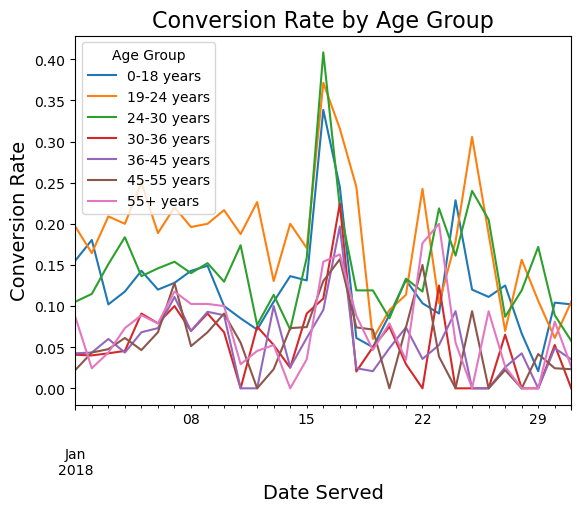

In [178]:
# Compute conversion rate by date and age group
age_group_conv = conversion_rate(df, ['date_served', 'age_group'])

# Convert to DataFrame: one column per age group
age_group_df = pd.DataFrame(age_group_conv.unstack())

# Plot
age_group_df.plot()

# Formatting
plt.title('Conversion Rate by Age Group', size=16)
plt.ylabel('Conversion Rate', size=14)
plt.xlabel('Date Served', size=14)
plt.legend(title='Age Group')
plt.show()


In [179]:
def plotting_conv(dataframe):
    for column in dataframe:
        plt.figure(figsize=(10, 5))  # Make plot wider

        # Plot column
        plt.plot(dataframe.index, dataframe[column])

        # Titles and labels
        plt.title('Daily ' + str(column) + ' conversion rate\n', size=16)
        plt.ylabel('Conversion rate', size=14)
        plt.xlabel('Date', size=14)

        # Rotate x-axis labels
        plt.xticks(rotation=45)

        plt.tight_layout()  # Prevent label cutoff
        plt.show()
        plt.clf()

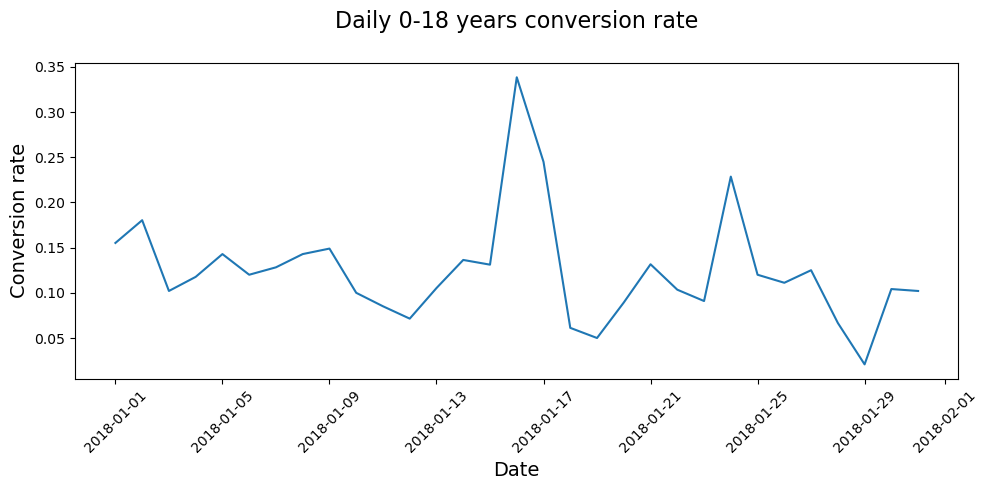

<Figure size 640x480 with 0 Axes>

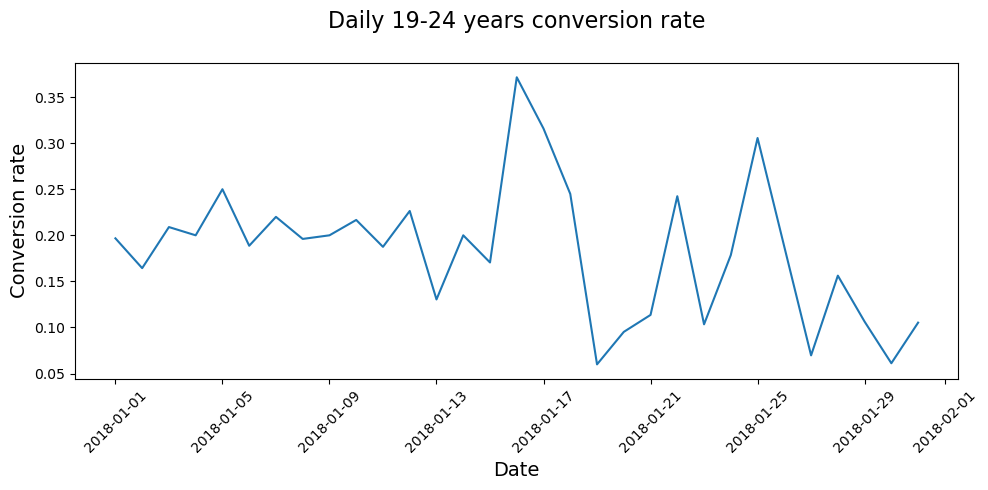

<Figure size 640x480 with 0 Axes>

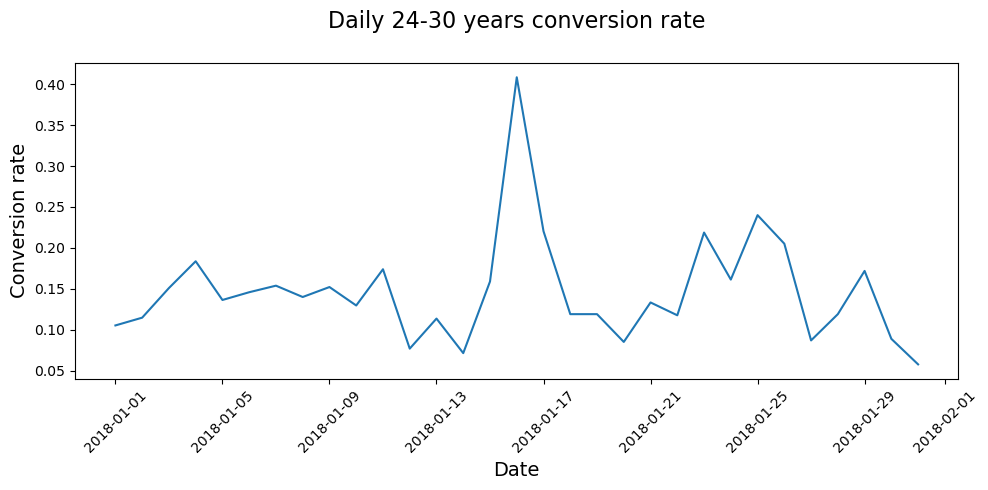

<Figure size 640x480 with 0 Axes>

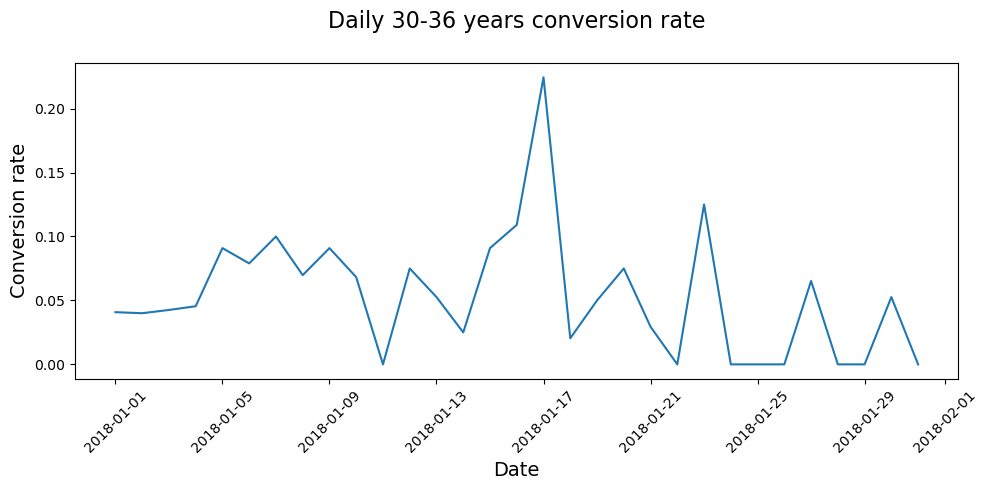

<Figure size 640x480 with 0 Axes>

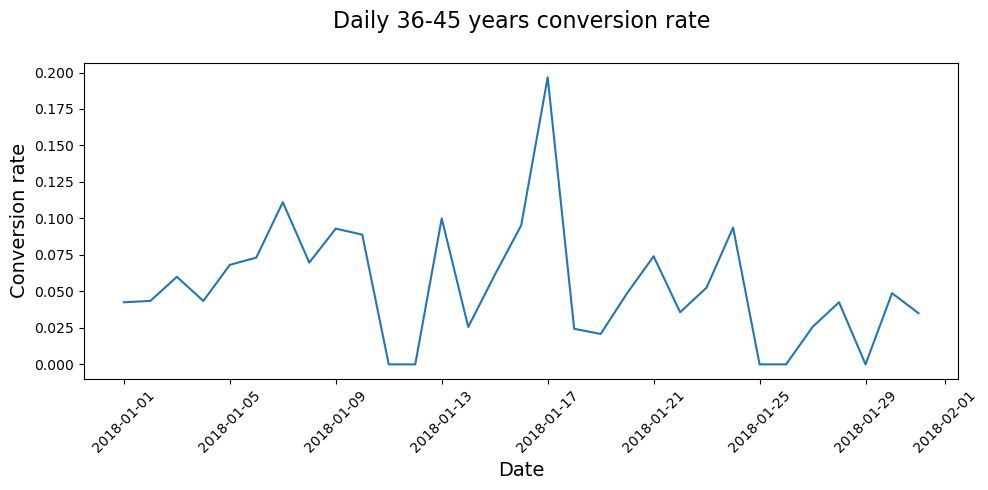

<Figure size 640x480 with 0 Axes>

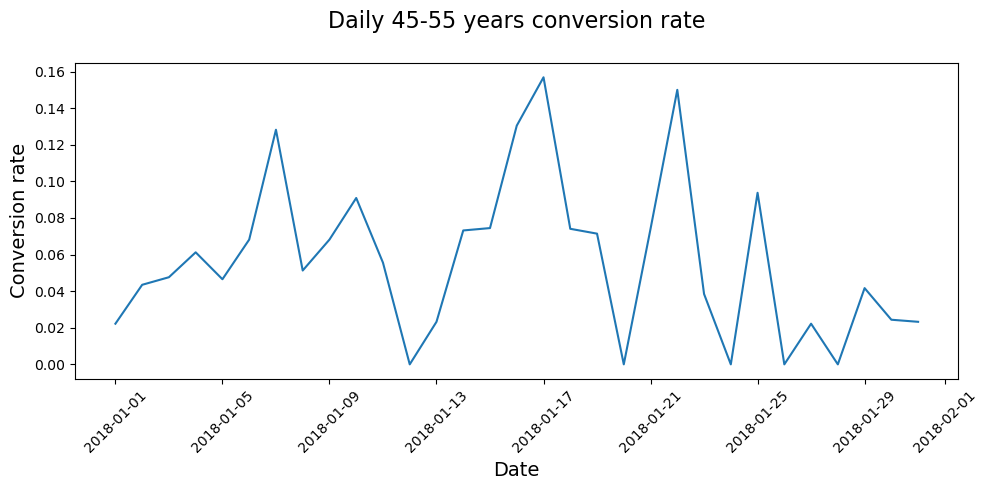

<Figure size 640x480 with 0 Axes>

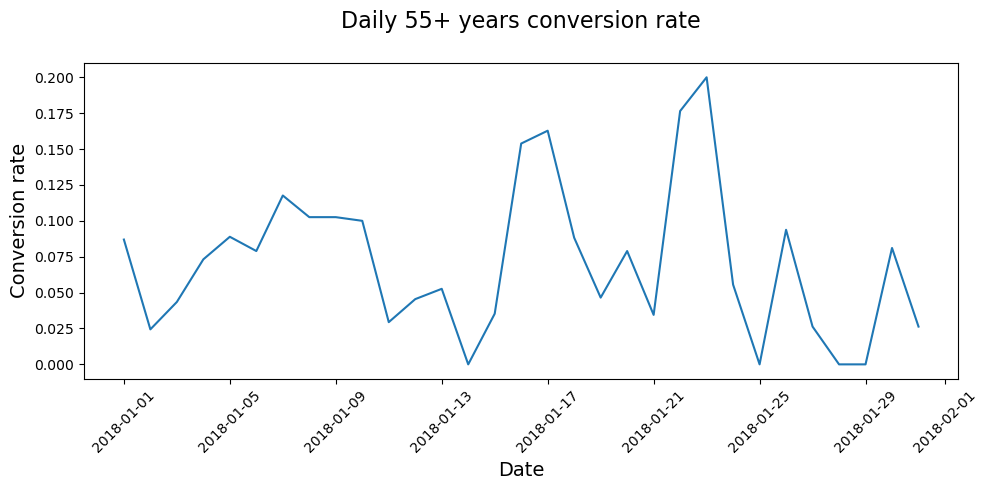

<Figure size 640x480 with 0 Axes>

In [180]:
# Calculate conversion rate by date served and age group
age_group_conv = conversion_rate(df, ['date_served', 'age_group'])

# Unstack age_group_conv and create a DataFrame
age_group_df = pd.DataFrame(age_group_conv.unstack())

# Plot the results
plotting_conv(age_group_df)

date_served  marketing_channel
2018-01-01   Email                1.000000
             Facebook             0.117647
             House Ads            0.084656
             Instagram            0.106667
             Push                 0.083333
Name: user_id, dtype: float64


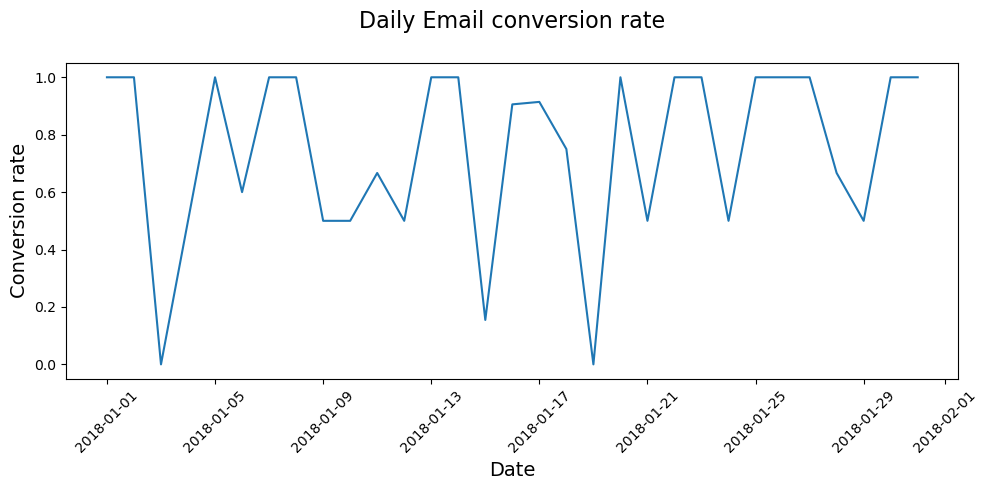

<Figure size 640x480 with 0 Axes>

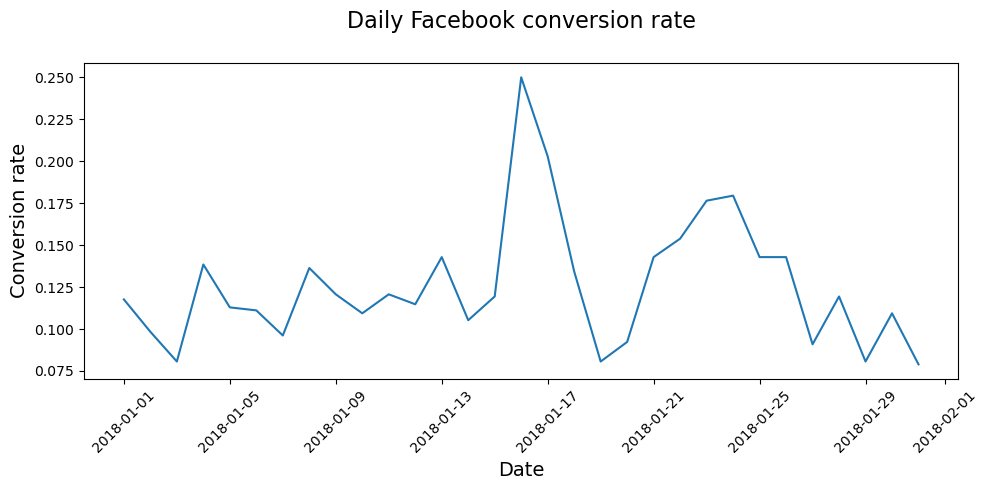

<Figure size 640x480 with 0 Axes>

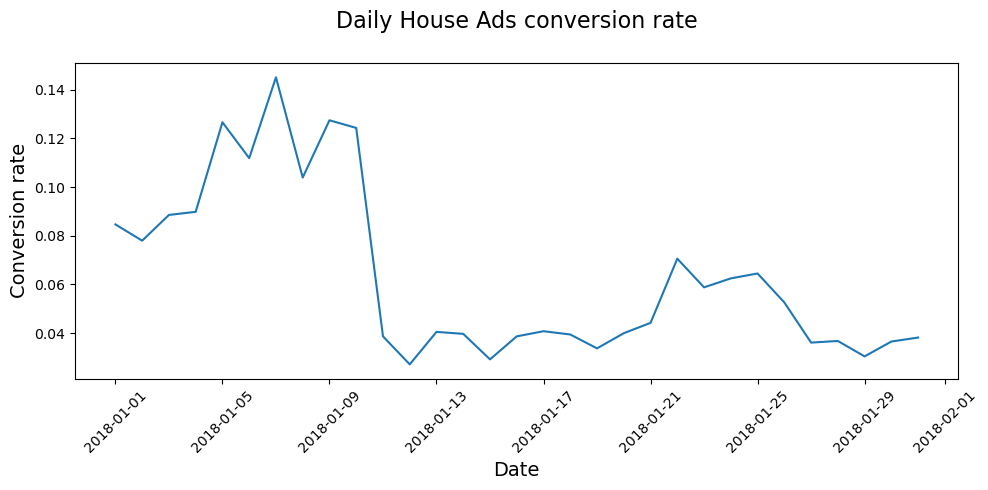

<Figure size 640x480 with 0 Axes>

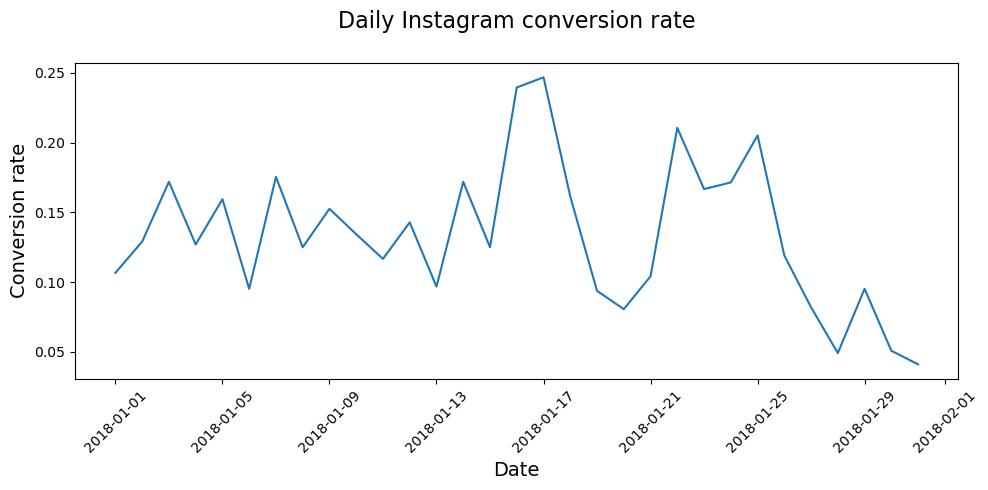

<Figure size 640x480 with 0 Axes>

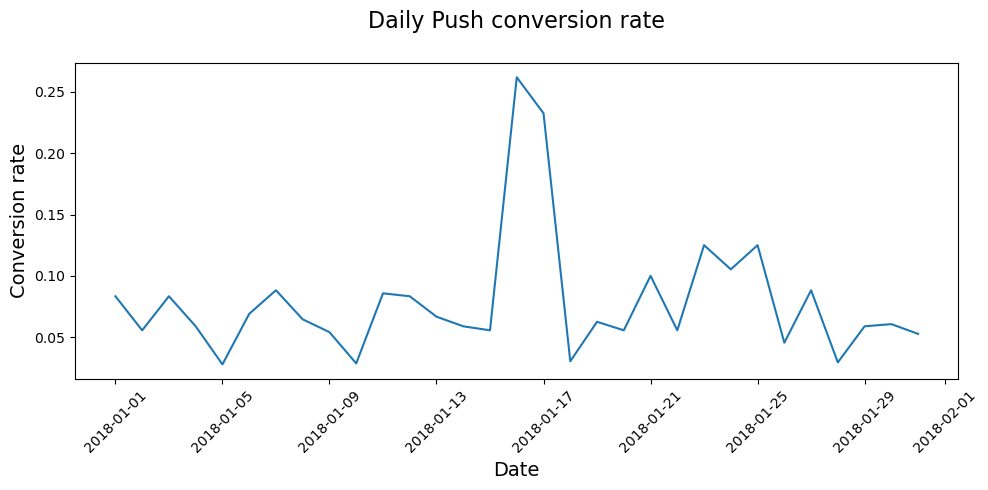

<Figure size 640x480 with 0 Axes>

In [183]:
# Calculate conversion rate by date served and channel
daily_conv_channel = conversion_rate(df, ['date_served', 'marketing_channel'])

print(daily_conv_channel.head())

# Calculate conversion rate by date served and channel
daily_conv_channel = conversion_rate(df, ['date_served', 
                                                 'marketing_channel'])

# Unstack daily_conv_channel and convert it to a DataFrame
daily_conv_channel = pd.DataFrame(daily_conv_channel.unstack())

# Plot results of daily_conv_channel
plotting_conv(daily_conv_channel)

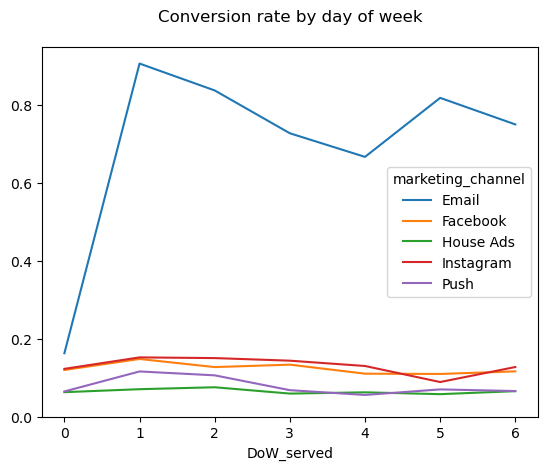

In [199]:

# Calculate conversion rate by day of week
DoW_conversion = conversion_rate(df, ['DoW_served', 'marketing_channel'])


# Unstack channels
DoW_df = pd.DataFrame(DoW_conversion.unstack())

# Plot conversion rate by day of week
DoW_df.plot()
plt.title('Conversion rate by day of week\n')
plt.ylim(0)
plt.show()

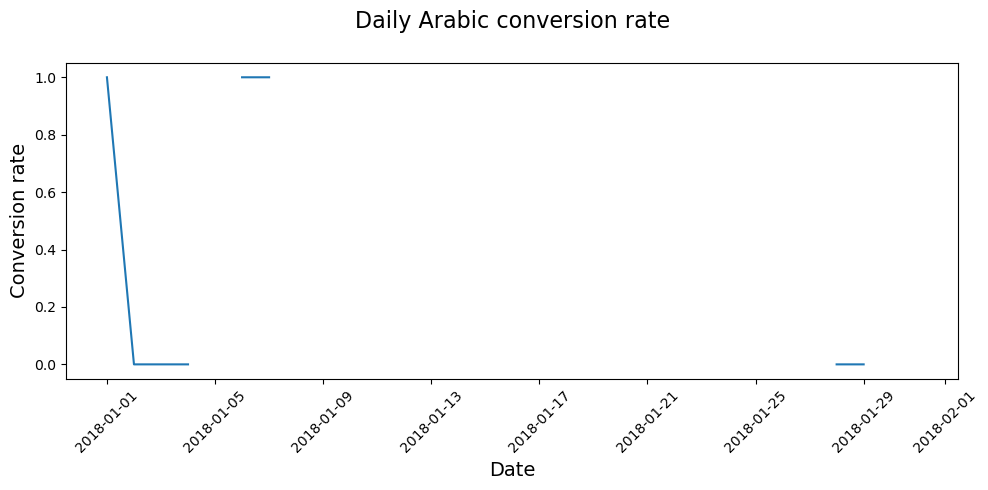

<Figure size 640x480 with 0 Axes>

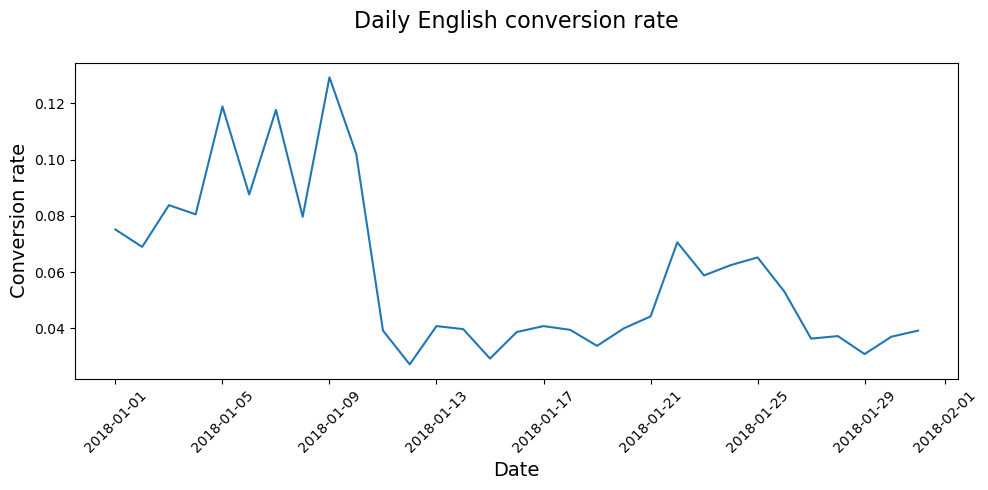

<Figure size 640x480 with 0 Axes>

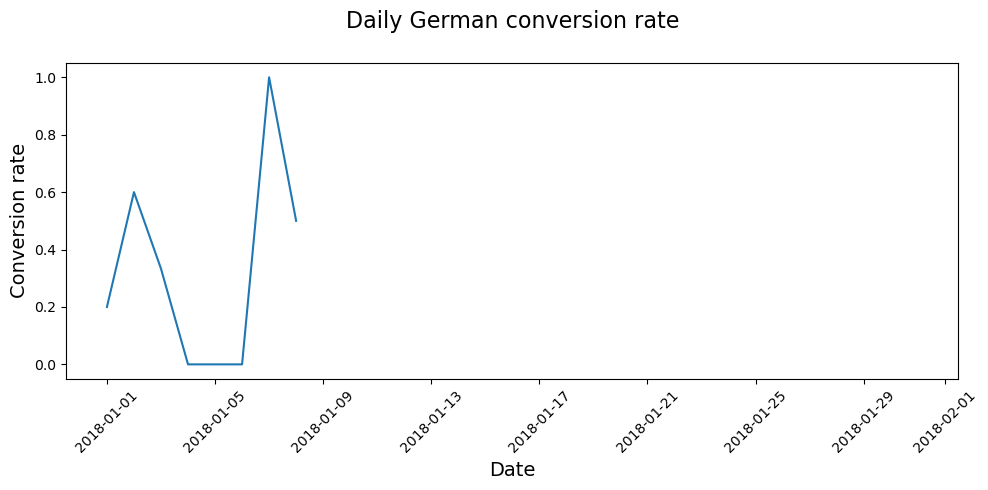

<Figure size 640x480 with 0 Axes>

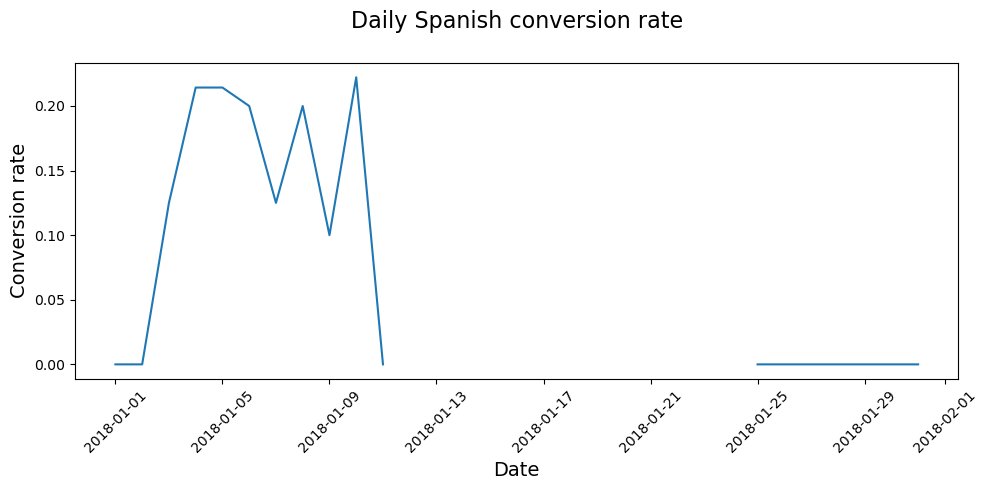

<Figure size 640x480 with 0 Axes>

In [201]:
house_ads = df[df['marketing_channel']=='House Ads']

# Calculate conversion by date served, and language displayed
conv_lang_channel = conversion_rate(house_ads, ['date_served', 'language_displayed'])

# Unstack conv_lang_channel
conv_lang_df = pd.DataFrame(conv_lang_channel.unstack(level=1))

# Use your plotting function to display results
plotting_conv(conv_lang_df)

In [202]:
language_check = house_ads.groupby(['date_served', 'is_correct_lang'])['is_correct_lang'].count()

language_check_df = pd.DataFrame(language_check.unstack()).fillna(0)

print(language_check_df)

is_correct_lang    No    Yes
date_served                 
2018-01-01        2.0  189.0
2018-01-02        3.0  247.0
2018-01-03        0.0  220.0
2018-01-04        0.0  168.0
2018-01-05        0.0  160.0
2018-01-06        1.0  151.0
2018-01-07        2.0  130.0
2018-01-08        0.0  154.0
2018-01-09        0.0  157.0
2018-01-10        0.0  170.0
2018-01-11       20.0  135.0
2018-01-12       18.0  130.0
2018-01-13       26.0  122.0
2018-01-14       20.0  131.0
2018-01-15       16.0  192.0
2018-01-16       28.0  127.0
2018-01-17       21.0  127.0
2018-01-18       31.0  121.0
2018-01-19       22.0  127.0
2018-01-20       28.0  124.0
2018-01-21       14.0  100.0
2018-01-22       13.0   72.0
2018-01-23       16.0   69.0
2018-01-24       13.0   83.0
2018-01-25       19.0   74.0
2018-01-26       24.0   92.0
2018-01-27       18.0  149.0
2018-01-28       28.0  136.0
2018-01-29       24.0  142.0
2018-01-30       23.0  145.0
2018-01-31       23.0  135.0


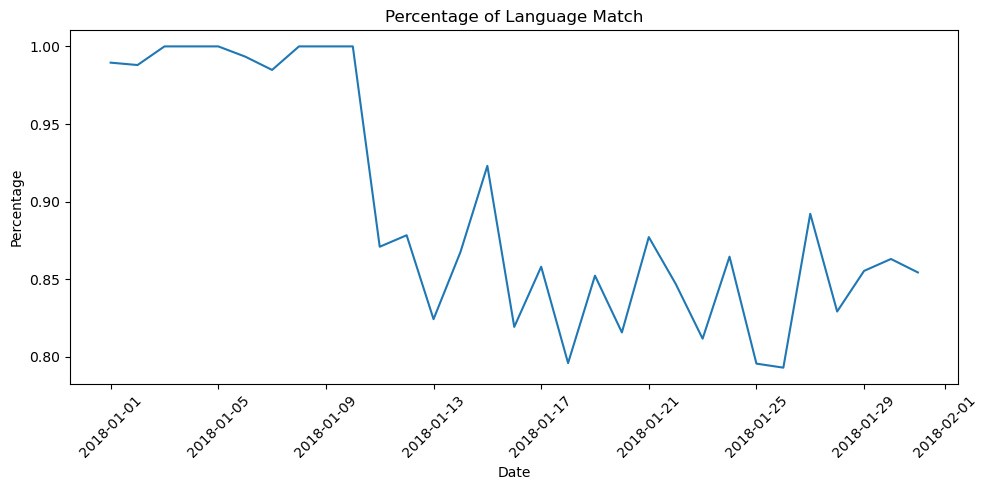

In [203]:
# Calculate percentage
language_check_df['pct'] = language_check_df['Yes'] / language_check_df.sum(axis=1)

# Plot
plt.figure(figsize=(10, 5))
plt.plot(language_check_df.index.values, language_check_df['pct'])

# Add title and axis labels
plt.title('Percentage of Language Match')
plt.xlabel('Date')
plt.ylabel('Percentage')

# Rotate x-axis labels
plt.xticks(rotation=45)

# Fix layout
plt.tight_layout()
plt.show()


In [204]:
# Calculate pre-error conversion rate
house_ads_bug = house_ads[house_ads['date_served'] < '2018-01-11']
lang_conv = conversion_rate(house_ads_bug, ['language_displayed'])

# Index other language conversion rate against English
spanish_index = lang_conv['Spanish']/lang_conv['English']
arabic_index = lang_conv['Arabic']/lang_conv['English']
german_index = lang_conv['German']/lang_conv['English']

print("Spanish index:", spanish_index)
print("Arabic index:", arabic_index)
print("German index:", german_index)

Spanish index: 1.681924882629108
Arabic index: 5.045774647887324
German index: 4.485133020344287


In [207]:
# Group house_ads by date and language
converted = house_ads.groupby(['date_served', 'language_preferred'])\
                        .agg({'user_id':'nunique',
                              'converted':'sum'})

# Unstack converted
converted_df = pd.DataFrame(converted.unstack())

In [210]:
# Create English conversion rate column for affected period
converted['english_conv_rate'] = converted_df.loc['2018-01-11':'2018-01-31'][('converted','English')]

# Create expected conversion rates for each language
converted['expected_spanish_rate'] = converted['english_conv_rate']*spanish_index
converted['expected_arabic_rate'] = converted['english_conv_rate']*arabic_index
converted['expected_german_rate'] = converted['english_conv_rate']*german_index

# Multiply number of users by the expected conversion rate
converted['expected_spanish_conv'] = converted['expected_spanish_rate']/100*converted_df[('user_id','Spanish')]
converted['expected_arabic_conv'] = converted['expected_arabic_rate']/100*converted_df[('user_id','Arabic')]
converted['expected_german_conv'] = converted['expected_german_rate']/100*converted_df[('user_id','German')]

## 4. A/B Testing

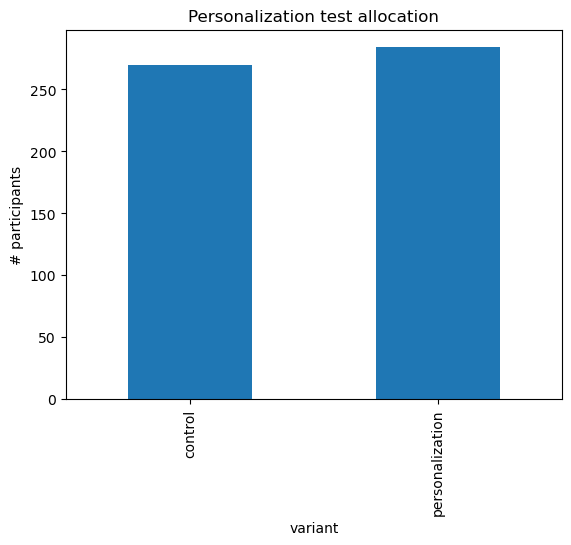

In [214]:
email = df[df['marketing_channel'] == 'Email']


# Group the email DataFrame by variant 
alloc = email.groupby(['variant'])['user_id'].nunique()

# Plot a bar chart of the test allocation
alloc.plot(kind = "bar")
plt.title('Personalization test allocation')
plt.ylabel('# participants')
plt.show()

In [216]:
subscribers = email.groupby(['user_id', 
                             'variant'])['converted'].max()
subscribers_df = pd.DataFrame(subscribers.unstack(level=1)) 

# Drop missing values from the control column
control = subscribers_df['control'].dropna()

# Drop missing values from the personalization column
personalization = subscribers_df['personalization'].dropna()

print('Control conversion rate:', np.mean(control))
print('Personalization conversion rate:', np.mean(personalization))

Control conversion rate: 0.2814814814814815
Personalization conversion rate: 0.3908450704225352


In [218]:

def lift(a,b):
    # Calcuate the mean of a and b
    a_mean = np.mean(a)
    b_mean = np.mean(b)
    
    # Calculate the lift using a_mean and b_mean
    lift = (b_mean-a_mean)/a_mean
  
    return str(round(lift*100, 2)) + '%'
  
# Print lift() with control and personalization as inputs
print(lift(control, personalization))

38.85%


In [220]:
def ab_segmentation(segment):
    for subsegment in np.unique(df[segment].values):
        print(subsegment)

        # Limit marketing to email and subsegment      
        email = df[(df['marketing_channel'] == 'Email') & (df[segment] == subsegment)]

        # Group and unstack
        subscribers = email.groupby(['user_id', 'variant'])['converted'].max()
        subscribers = pd.DataFrame(subscribers.unstack(level=1))

        # Drop NaNs
        control = subscribers['control'].dropna().astype(float)
        personalization = subscribers['personalization'].dropna().astype(float)

        # Calculate and print results
        print('lift:', lift(control, personalization))
        print('t-statistic:', stats.ttest_ind(control, personalization), '\n\n')

In [196]:
# Use ab_segmentation on language displayed
ab_segmentation('language_displayed')

# Use ab_segmentation on age group
ab_segmentation('age_group')

Arabic
lift: 50.0%
t-statistic: TtestResult(statistic=-0.5773502691896255, pvalue=0.5795840000000001, df=8.0) 


English
lift: 39.0%
t-statistic: TtestResult(statistic=-2.2183598646203215, pvalue=0.026991701290720503, df=486.0) 


German
lift: -1.62%
t-statistic: TtestResult(statistic=0.19100834180787182, pvalue=0.8494394170062678, df=42.0) 


Spanish
lift: 166.67%
t-statistic: TtestResult(statistic=-2.3570226039551585, pvalue=0.040156718110477524, df=10.0) 


0-18 years
lift: 121.4%
t-statistic: TtestResult(statistic=-2.966044912142212, pvalue=0.003872449439129706, df=89.0) 


19-24 years
lift: 106.24%
t-statistic: TtestResult(statistic=-3.0317943847866697, pvalue=0.0030623836114689195, df=105.0) 


24-30 years
lift: 161.19%
t-statistic: TtestResult(statistic=-3.861539544326876, pvalue=0.00018743381094867337, df=114.0) 


30-36 years
lift: -100.0%
t-statistic: TtestResult(statistic=3.185906464414798, pvalue=0.0023238487431765337, df=58.0) 


36-45 years
lift: -85.23%
t-statistic: Ttes

C:\Users\user\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)
